In [23]:
import pandas as pd
def read_wandb_csv(loc):
    df = pd.read_csv(loc)
    return df

In [55]:
df = read_wandb_csv("16_base_modded_sweep.csv")
df.param_config_id = df.param_config_id.astype('str')
df

,Name,Runtime,Notes,State,Tags,beta1,beta2,catch_dropout,early_stopping_patience,evaluation_steps,...,train_p_max,train_p_var,train_st1_loss,train_st1_p_max,train_st2_loss,train_st2_p_max,accuracy_mm,eval_loss_mm,eval_p_max_mm,eval_p_var_mm
0,16_modded_base_sweep_01_modded/run_44,1572,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.004575,0.995437,0.008518,0.992310,NaN,NaN,NaN,NaN
1,16_modded_base_sweep_01_modded/run_43,704,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.011043,0.989027,0.016709,0.983639,NaN,NaN,NaN,NaN
2,16_modded_base_sweep_01_modded/run_42,867,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.021117,0.988630,0.025776,0.985621,NaN,NaN,NaN,NaN
3,16_modded_base_sweep_01_modded/run_41,877,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.002476,0.997528,0.004003,0.996044,NaN,NaN,NaN,NaN
4,16_modded_base_sweep_01_modded/run_40,503,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.006797,0.993228,0.009856,0.990252,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,16_modded_base_sweep_00_modded/run_04,451,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.001729,0.998273,0.002485,0.997519,NaN,NaN,NaN,NaN
101,16_modded_base_sweep_00_modded/run_03,572,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.001064,0.998936,0.001985,0.998059,NaN,NaN,NaN,NaN
102,16_modded_base_sweep_00_modded/run_02,325,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.000561,0.999439,0.000852,0.999149,NaN,NaN,NaN,NaN
103,16_modded_base_sweep_00_modded/run_01,394,-,finished,modded,0.9,0.999,0,10,16,...,NaN,NaN,0.000802,0.999199,0.001087,0.998913,NaN,NaN,NaN,NaN


In [14]:
df.columns

Index(['Name', 'Runtime', 'Notes', 'State', 'Tags', 'beta1', 'beta2',
       'catch_dropout', 'early_stopping_patience', 'evaluation_steps',
       'insert_dropout', 'learning_rate', 'output_dir', 'param_config_id',
       'seed', 'weight_decay', 'accuracy', 'avg_grad_diff_all_classes',
       'avg_grad_diff_per_class', 'best_accuracy', 'best_accuracy_epoch',
       'best_accuracy_step', 'best_eval_loss', 'best_eval_loss_epoch',
       'best_eval_loss_step', 'epoch', 'eval_loss', 'eval_p_max', 'eval_p_var',
       'train_loss', 'train_p_max', 'train_p_var', 'train_st1_loss',
       'train_st1_p_max', 'train_st2_loss', 'train_st2_p_max', 'accuracy_mm',
       'eval_loss_mm', 'eval_p_max_mm', 'eval_p_var_mm'],
      dtype='object')

In [25]:
df.dtypes

Name                          object
Runtime                        int64
Notes                         object
State                         object
Tags                          object
beta1                        float64
beta2                        float64
catch_dropout                  int64
early_stopping_patience        int64
evaluation_steps               int64
insert_dropout               float64
learning_rate                float64
output_dir                    object
param_config_id               object
seed                           int64
weight_decay                 float64
accuracy                     float64
avg_grad_diff_all_classes    float64
avg_grad_diff_per_class       object
best_accuracy                float64
best_accuracy_epoch            int64
best_accuracy_step             int64
best_eval_loss               float64
best_eval_loss_epoch           int64
best_eval_loss_step            int64
epoch                          int64
eval_loss                    float64
e

<Axes: xlabel='insert_dropout', ylabel='learning_rate'>

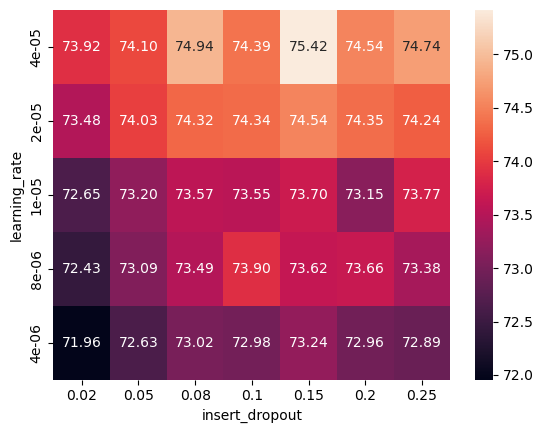

In [73]:
import seaborn as sns 
df_pivot = df.pivot_table(index=["learning_rate"],columns=["insert_dropout"],values=["best_accuracy"],aggfunc='median')
df_pivot = df_pivot.sort_index(ascending=False)
df_pivot.columns = df_pivot.columns.droplevel(0)
df_pivot = df_pivot * 100
sns.heatmap(
    data=df_pivot,
    annot=True,
    fmt='.2f'
)